In [1]:
%matplotlib inline

import sys
import wave
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pyaudio

from IPython.display import Audio, display

from bokeh.models.sources import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook

output_notebook()

Loading BokehJS ...

In [2]:
PYAUDIO_FORMAT = pyaudio.paInt16
NUMPY_FORMAT = np.int16
CHANNELS = 1

RATE = 44100
CHUNK = 1024*4

In [3]:
def plot_audio(data, fs, **kwargs):
    del_t = 1/fs
    t = np.arange(len(data))*del_t
    plt.plot(t, data, **kwargs)
    plt.xlabel('t [sec]')
    plt.ylabel('amplitude')

In [4]:
def print_inline(string):
    sys.stdout.write("\r" + str(string))
    sys.stdout.flush()

In [10]:
def init_plot():
    fig = figure(plot_width=200, plot_height=100, toolbar_location=None)
    fig.yaxis.visible = False
    data = ColumnDataSource(data={"x": [0], "y": [0]})
    fig.line("x", "y", source=data)
    handle = show(fig, notebook_handle=True)
    return data, handle


def update_plot(i, rate, chunksize, data, plot_data, handle):
    x = [i/rate*chunksize]
    y = [abs(np.fromstring(data, dtype=NUMPY_FORMAT)).mean()]
    new_plot_data = {'x': x, "y": y}
    plot_data.stream(new_plot_data, 100)
    push_notebook(handle=handle)

In [11]:
def frames2array(frames, dtype=NUMPY_FORMAT):
    return np.fromstring(b''.join(frames), dtype=dtype)

def record_audio(duration, rate=RATE, chunksize=CHUNK, pyaudio_format=PYAUDIO_FORMAT, 
                 numpy_format=NUMPY_FORMAT, plot=False):
    
    if plot: plot_data, handle = init_plot()

    p = pyaudio.PyAudio()
    
    frames = []

    stream = p.open(format=pyaudio_format,
                    channels=1,
                    rate=rate,
                    input=True,
                    frames_per_buffer=chunksize)

    for i in range(0, int(rate / chunksize * duration)):
        data = stream.read(chunksize)
        frames.append(data)
        print_inline("*** recording {} / {} ***".format(datetime.timedelta(seconds=i/rate*chunksize),
                                  datetime.timedelta(seconds=duration)))

        if plot: update_plot(i, rate, chunksize, data, plot_data, handle)

    print()
    print("done!")

    stream.stop_stream()
    stream.close()
    p.terminate()

    return frames2array(frames, dtype=numpy_format)

In [7]:
recording = record_audio(4)
Audio(recording, rate=RATE)

*** recording 0:00:03.900952 / 0:00:04 ***
done!


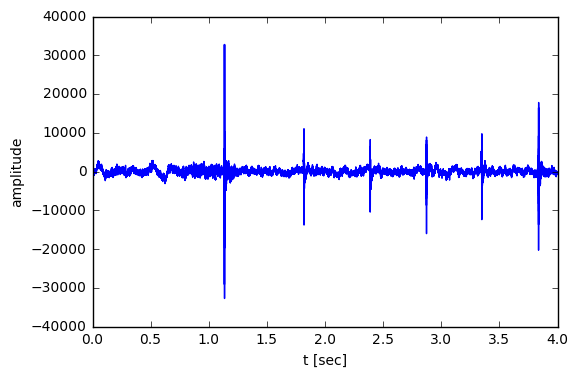

In [8]:
plot_audio(recording, RATE)

In [12]:
recording = record_audio(4, plot=True)

*** recording 0:00:03.900952 / 0:00:04 ***
done!


In [13]:
pwd

'/media/progs_daten/dokumente/codes/drumplify_proj/python'